In [2]:
from Bio import SeqIO
import pandas as pd

# DNA Motifs 
motifs = ["ATG", "TAT", "CGC"]


# Insert Fasta file path
fasta_path = "data/large_example.fasta"
results = []

#Itteration through sequences and Table creation
for record in SeqIO.parse(fasta_path, "fasta"):
    seq_id = record.id
    sequence = str(record.seq)
    seq_len = len(sequence)

    row = {"Sequence ID": seq_id, "Sequence Length": seq_len}
    
    for motif in motifs:
        count = sequence.count(motif)
        row[motif] = count
        row[f"{motif} Density"] = count / seq_len  # motif density
    
    # GC and AT content
    gc_content = (sequence.count("G") + sequence.count("C")) / seq_len * 100
    at_content = (sequence.count("A") + sequence.count("T")) / seq_len * 100
    row["GC Content (%)"] = round(gc_content, 2)
    row["AT Content (%)"] = round(at_content, 2)
    
    results.append(row)

df = pd.DataFrame(results)
df

,Sequence ID,Sequence Length,ATG,ATG Density,TAT,TAT Density,CGC,CGC Density,GC Content (%),AT Content (%)
0,Sequence_1,1000,15,0.015,10,0.010,18,0.018,50.0,50.0
1,Sequence_2,1000,14,0.014,15,0.015,17,0.017,49.8,50.2
2,Sequence_3,1000,15,0.015,16,0.016,15,0.015,50.0,50.0
3,Sequence_4,1000,14,0.014,15,0.015,16,0.016,50.8,49.2
4,Sequence_5,1000,14,0.014,16,0.016,17,0.017,51.6,48.4
...,...,...,...,...,...,...,...,...,...,...
95,Sequence_96,1000,23,0.023,17,0.017,12,0.012,50.1,49.9
96,Sequence_97,1000,12,0.012,12,0.012,11,0.011,49.2,50.8
97,Sequence_98,1000,18,0.018,12,0.012,15,0.015,50.7,49.3
98,Sequence_99,1000,15,0.015,7,0.007,13,0.013,51.2,48.8


<Figure size 1000x800 with 0 Axes>

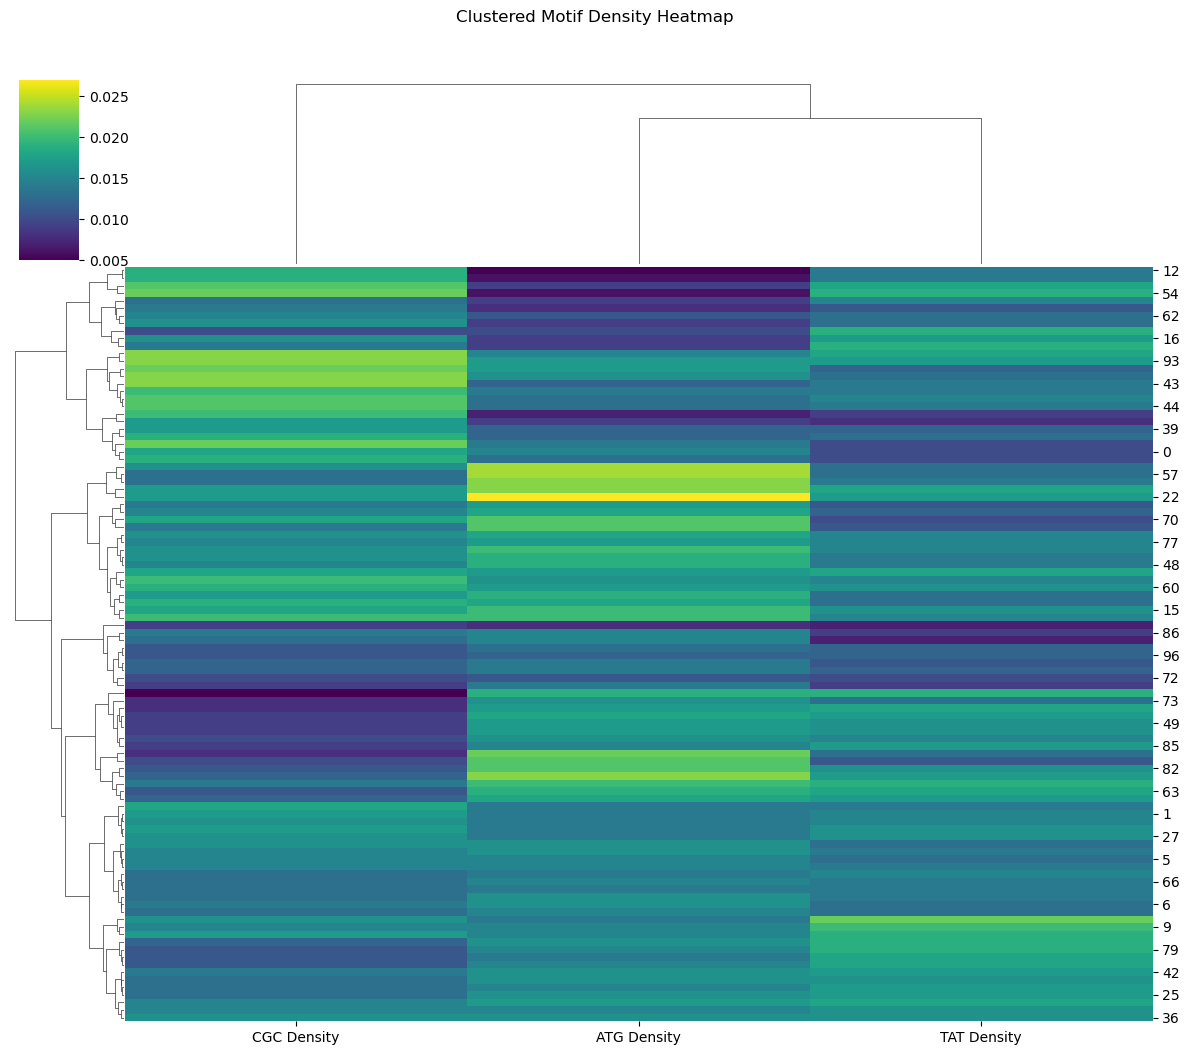

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt


density_cols = [col for col in df.columns if "Density" in col]
heatmap_data = df[density_cols]

#Create heatmap of Motif Density
plt.figure(figsize=(10, 8))
sns.clustermap(
    heatmap_data,
    cmap="viridis",
    metric="euclidean",     # distance measurement
    method="ward",          # clustering method
    figsize=(12, 10),
    dendrogram_ratio=(0.1, 0.2),
)

plt.suptitle("Clustered Motif Density Heatmap", y=1.05)
plt.show()